In [99]:
import pandas as pd
import random
import matplotlib.pyplot as plt 

In [2]:
df_hits = pd.read_csv('ga_hits_prep')

In [3]:
df_hits.head()

,Unnamed: 0,session_id,hit_number,hit_referer,hit_page_path,event_action
0,0,5639623078712724064.1640254056.1640254056,30,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show
1,1,7750352294969115059.1640271109.1640271109,41,other,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show
2,2,885342191847998240.1640235807.1640235807,49,other,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show
3,3,142526202120934167.1640211014.1640211014,46,other,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show
4,4,3450086108837475701.1640265078.1640265078,79,other,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show


In [4]:
#целевые действия
aim =  ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

In [5]:
df_sessions = pd.read_csv('ga_sessions_prep')

C:\Users\admin\AppData\Local\Temp\ipykernel_896\3493964733.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('ga_sessions_prep')


In [6]:
df_sessions.head(5)

,Unnamed: 0,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_keyword,device_category,device_os,device_brand,device_browser,geo_country,geo_city
0,0,9055434745589932991.1637753792.1637753792,2108382700.163776,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Zlatoust
1,1,905544597018549464.1636867290.1636867290,210838531.163687,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Samsung Internet,Russia,Moscow
2,2,9055446045651783499.1640648526.1640648526,2108385331.164065,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk
3,3,9055447046360770272.1622255328.1622255328,2108385564.162225,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Xiaomi,Chrome,Russia,Moscow
4,4,9055447046360770272.1622255345.1622255345,2108385564.162225,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Xiaomi,Chrome,Russia,Moscow


In [7]:
#Объединим два датасета по session id
df_merge = df_sessions.merge(df_hits, how = 'left', on = 'session_id')

In [8]:
df_merge

,Unnamed: 0_x,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_keyword,device_category,device_os,device_brand,device_browser,geo_country,geo_city,Unnamed: 0_y,hit_number,hit_referer,hit_page_path,event_action
0,0,9055434745589932991.1637753792.1637753792,2108382700.163776,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Zlatoust,1614540.0,3.0,other,podpiska.sberauto.com/,sub_landing
1,0,9055434745589932991.1637753792.1637753792,2108382700.163776,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Zlatoust,1615093.0,4.0,other,podpiska.sberauto.com/,sub_view_cars_click
2,1,905544597018549464.1636867290.1636867290,210838531.163687,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Samsung Internet,Russia,Moscow,1211514.0,3.0,other,podpiska.sberauto.com/,sub_landing
3,2,9055446045651783499.1640648526.1640648526,2108385331.164065,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,1496106.0,10.0,other,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form_region
4,2,9055446045651783499.1640648526.1640648526,2108385331.164065,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,2057760.0,13.0,other,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form_region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15812990,1860041,9055430416266113553.1640968742.1640968742,2108381692.164097,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,oKjXDUsycmahkgMhGdAR,desktop,Linux,unknown,Chrome,Russia,Moscow,3590125.0,11.0,other,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,view_card
15812991,1860041,9055430416266113553.1640968742.1640968742,2108381692.164097,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,oKjXDUsycmahkgMhGdAR,desktop,Linux,unknown,Chrome,Russia,Moscow,3590126.0,16.0,other,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,view_new_card
15812992,1860041,9055430416266113553.1640968742.1640968742,2108381692.164097,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,oKjXDUsycmahkgMhGdAR,desktop,Linux,unknown,Chrome,Russia,Moscow,14825167.0,3.0,other,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,view_card
15812993,1860041,9055430416266113553.1640968742.1640968742,2108381692.164097,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,oKjXDUsycmahkgMhGdAR,desktop,Linux,unknown,Chrome,Russia,Moscow,14825168.0,14.0,other,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,view_card


In [9]:
len(df_merge[df_merge.event_action.isna()])

127776

In [10]:
df_hits[df_hits.session_id == '9055434745589932991.1637753792.1637753792']

,Unnamed: 0,session_id,hit_number,hit_referer,hit_page_path,event_action
1614540,1614540,9055434745589932991.1637753792.1637753792,3,other,podpiska.sberauto.com/,sub_landing
1615093,1615093,9055434745589932991.1637753792.1637753792,4,other,podpiska.sberauto.com/,sub_view_cars_click


# Проверка гипотезы органического и платного траффика

In [11]:
org_list = ['organic', 'referral', '(none)']

In [12]:
df_organic = df_merge[df_merge.utm_medium.isin(org_list)]

In [13]:
df_organic

,Unnamed: 0_x,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_keyword,device_category,device_os,device_brand,device_browser,geo_country,geo_city,Unnamed: 0_y,hit_number,hit_referer,hit_page_path,event_action
24,5,9055447192389856083.1622453074.1622453074,2108385598.162245,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,unknown,mobile,unknown,Apple,Safari,Russia,Saint Petersburg,4638963.0,5.0,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_landing
25,5,9055447192389856083.1622453074.1622453074,2108385598.162245,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,unknown,mobile,unknown,Apple,Safari,Russia,Saint Petersburg,4643037.0,6.0,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_view_cars_click
26,5,9055447192389856083.1622453074.1622453074,2108385598.162245,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,unknown,mobile,unknown,Apple,Safari,Russia,Saint Petersburg,4669742.0,25.0,HbolMJUevblAbkHClEQa,sberauto.com/cars/e1f862ea?rental_page=rental_car,view_card
27,5,9055447192389856083.1622453074.1622453074,2108385598.162245,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,unknown,mobile,unknown,Apple,Safari,Russia,Saint Petersburg,4669745.0,27.0,HbolMJUevblAbkHClEQa,sberauto.com/cars/e1f862ea?rental_page=rental_car,view_card
28,5,9055447192389856083.1622453074.1622453074,2108385598.162245,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,unknown,mobile,unknown,Apple,Safari,Russia,Saint Petersburg,4669754.0,34.0,HbolMJUevblAbkHClEQa,sberauto.com/cars/e1f862ea?rental_page=rental_car,view_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15812975,1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Russia,Moscow,14638264.0,55.0,other,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,view_new_card
15812976,1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Russia,Moscow,14764632.0,16.0,other,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,view_card
15812977,1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Russia,Moscow,15321375.0,3.0,other,podpiska.sberauto.com/,sub_landing
15812978,1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Russia,Moscow,15325732.0,13.0,other,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,view_new_card


In [14]:
df_organic = df_organic.dropna(subset = 'event_action')

In [15]:
df_organic.event_action.isna().sum()

0

In [16]:
df_nonorganic = df_merge.drop(df_merge[df_merge.utm_medium.isin(org_list)].index)

In [17]:
df_nonorganic = df_nonorganic.dropna(subset = 'event_action')
df_nonorganic.event_action.isna().sum()

0

In [18]:
df_nonorganic.shape

(9867652, 19)

In [19]:
df_organic.shape

(5817567, 19)

In [20]:
df_n1 = df_nonorganic.copy()

In [21]:
df_n1 = df_n1.drop_duplicates(subset = 'session_id')

In [22]:
df_n1.shape

(1263346, 19)

In [23]:
#кол-во целевых действий по платному траффику
len(df_n1[df_n1.event_action.isin(aim)])

3605

In [24]:
#суммарное кол-во действий по платному траффику
len(df_n1)

1263346

In [25]:
#CR платного траффика
crn = (len(df_n1[df_n1.event_action.isin(aim)])/len(df_n1))*100
print(crn)

0.285353339465198


In [26]:
df_o1 = df_organic.copy()

In [27]:
df_o1 = df_o1.drop_duplicates(subset = 'session_id')

In [28]:
#кол-во целевых действий по органическому траффику
len(df_o1[df_o1.event_action.isin(aim)])

1624

In [29]:
#суммарное кол-во действий по органическому траффику
len(df_o1)

468920

In [30]:
#СR органического траффика
cro = (len(df_o1[df_o1.event_action.isin(aim)])/len(df_o1))*100
print(cro)

0.34632773180926385


In [31]:
#Можем видеть, что Cr органического траффика выше платного

# Проверка гипотезы о конверсиях с моб. и десктопных устройств

In [32]:
df_merge.device_category.value_counts()

mobile     11701733
desktop     3965226
tablet       146036
Name: device_category, dtype: int64

In [33]:
df_desktop = df_merge[df_merge.device_category == 'desktop']

In [34]:
df_desktop.shape

(3965226, 19)

In [35]:
df_mobile = df_merge[df_merge.device_category == 'mobile']

In [36]:
df_mobile.shape

(11701733, 19)

In [37]:
df_desktop.event_action.isin(aim).sum()

25243

In [38]:
len(df_desktop)

3965226

In [39]:
crdesktop = df_desktop.event_action.isin(aim).sum()/len(df_desktop)*100
print(crdesktop)

0.6366093635016011


In [40]:
df_mobile.event_action.isin(aim).sum()

76834

In [41]:
len(df_mobile)

11701733

In [42]:
crmobile = df_mobile.event_action.isin(aim).sum()/len(df_mobile)*100
print(crmobile)

0.6566035988002803


In [43]:
#конверсия по мобильным устройствам не отличается от конверсии десктопных

# Проверка гипотезы о конверсиях Москвы, МО и СПБ с конверсией остальных городов

In [44]:
df_merge.head(5)

,Unnamed: 0_x,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_keyword,device_category,device_os,device_brand,device_browser,geo_country,geo_city,Unnamed: 0_y,hit_number,hit_referer,hit_page_path,event_action
0,0,9055434745589932991.1637753792.1637753792,2108382700.163776,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Zlatoust,1614540.0,3.0,other,podpiska.sberauto.com/,sub_landing
1,0,9055434745589932991.1637753792.1637753792,2108382700.163776,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Zlatoust,1615093.0,4.0,other,podpiska.sberauto.com/,sub_view_cars_click
2,1,905544597018549464.1636867290.1636867290,210838531.163687,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Samsung Internet,Russia,Moscow,1211514.0,3.0,other,podpiska.sberauto.com/,sub_landing
3,2,9055446045651783499.1640648526.1640648526,2108385331.164065,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,1496106.0,10.0,other,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form_region
4,2,9055446045651783499.1640648526.1640648526,2108385331.164065,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,2057760.0,13.0,other,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form_region


In [45]:
df_merge.geo_city.value_counts().head(60)

Moscow              6849519
Saint Petersburg    2383906
(not set)            601154
Yekaterinburg        330534
Krasnodar            295484
Kazan                277798
Samara               228334
Nizhny Novgorod      201471
Ufa                  198589
Novosibirsk          192369
Chelyabinsk          139304
Krasnoyarsk          136825
Voronezh             136051
Tula                 129120
Rostov-on-Don        128585
Irkutsk              115109
Grozny               113275
Balashikha           108401
Vladivostok           99684
Yaroslavl             85547
Sochi                 84136
Khimki                71919
Tyumen                64402
Saratov               62476
Perm                  60920
Odintsovo             53747
Vidnoye               52000
Mytishchi             49241
Izhevsk               47982
Zheleznodorozhny      44591
Domodedovo            41780
Lipetsk               40854
Stavropol             40581
Korolyov              37601
Omsk                  36863
Pyatigorsk          

In [46]:
mo_spb_list = ['Moscow', 'Saint Petersburg','Balashikha','Khimki','Odintsovo','Vidnoye','Mytishchi','Zheleznodorozhny','Domodedovo','Korolyov','Podolsk','Dolgoprudny','Reutov','Pushkino']

In [100]:
df_plot_cities = pd.DataFrame(columns = ['city','cr'])

In [101]:
for city in mo_spb_list:
    df_city_mo_spb = df_merge[df_merge.geo_city == city]
    cr_mo_spb = df_city_mo_spb.event_action.isin(aim).sum()/len(df_city_mo_spb)*100
    print(f'Конверсия города {city} - {cr_mo_spb}')
    df_plot_cities.loc[len(df_plot_cities.index)] = [city, cr_mo_spb] 
    
    

Конверсия города Moscow - 0.7482131227024846
Конверсия города Saint Petersburg - 0.5761972158298188
Конверсия города Balashikha - 0.6051604689993635
Конверсия города Khimki - 0.5992853070815779
Конверсия города Odintsovo - 0.7293430330995219
Конверсия города Vidnoye - 0.49615384615384617
Конверсия города Mytishchi - 0.4995836802664446
Конверсия города Zheleznodorozhny - 0.4148819268462246
Конверсия города Domodedovo - 1.9506941120153183
Конверсия города Korolyov - 1.0638014946410999
Конверсия города Podolsk - 0.5993573900148295
Конверсия города Dolgoprudny - 0.6415367886915548
Конверсия города Reutov - 0.5219074876888757
Конверсия города Pushkino - 0.5544683626875407


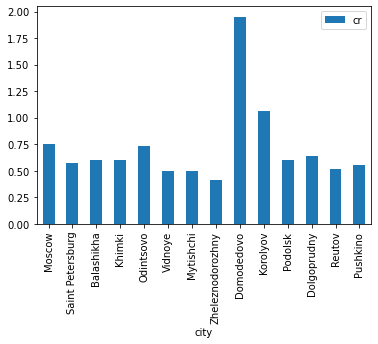

In [109]:
df_plot_cities.plot(kind = 'bar', x = 'city', y = 'cr')
plt.show()

In [48]:
sum_cities_set = set(df_merge.geo_city.values.tolist())
cities_except_mo_spb = list(sum_cities_set.difference(mo_spb_list))

In [49]:
rnd_city = random.sample(cities_except_mo_spb, 30)

In [50]:
for city in rnd_city:
    df_city = df_merge[df_merge.geo_city == city]
    cr_city_except_mo_spb = df_city.event_action.isin(aim).sum()/len(df_city)*100
    print(f'Конверсия города {city} - {cr_city_except_mo_spb}')

Конверсия города Nagareyama - 0.0
Конверсия города Bad Ragaz - 0.0
Конверсия города Frisco - 0.0
Конверсия города Sofia - 0.5192107995846313
Конверсия города Pavlovo - 2.111111111111111
Конверсия города Ekibastuz - 0.0
Конверсия города Bologna - 1.6666666666666667
Конверсия города Sarapul - 0.0
Конверсия города Barnsley - 0.0
Конверсия города Berdyans'k - 0.0
Конверсия города Alfredo V. Bonfil - 0.0
Конверсия города Norderstedt - 0.0
Конверсия города Nagasaki - 0.0
Конверсия города Yeysk - 0.1049317943336831
Конверсия города Seminole - 3.048780487804878
Конверсия города Kingisepp - 0.5353319057815845
Конверсия города Schiedam - 0.0
Конверсия города Donauworth - 0.0
Конверсия города Delft - 0.0
Конверсия города 61925 - 0.0
Конверсия города Kostomuksha - 0.0
Конверсия города Overland Park - 0.0
Конверсия города Sunnyvale - 0.0
Конверсия города Russkiy - 0.0
Конверсия города Guingamp - 5.555555555555555
Конверсия города Kamianske - 0.0
Конверсия города Cirencester - 0.0
Конверсия города S

In [51]:
df_msc = df_merge[df_merge.geo_city.isin(mo_spb_list)]

In [52]:
df_msc.head(10)

,Unnamed: 0_x,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_keyword,device_category,device_os,device_brand,device_browser,geo_country,geo_city,Unnamed: 0_y,hit_number,hit_referer,hit_page_path,event_action
2,1,905544597018549464.1636867290.1636867290,210838531.163687,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Samsung Internet,Russia,Moscow,1211514.0,3.0,other,podpiska.sberauto.com/,sub_landing
19,3,9055447046360770272.1622255328.1622255328,2108385564.162225,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Xiaomi,Chrome,Russia,Moscow,5265125.0,2.0,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_landing
20,3,9055447046360770272.1622255328.1622255328,2108385564.162225,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Xiaomi,Chrome,Russia,Moscow,5271655.0,6.0,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_landing
21,3,9055447046360770272.1622255328.1622255328,2108385564.162225,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Xiaomi,Chrome,Russia,Moscow,5275439.0,7.0,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_view_cars_click
22,4,9055447046360770272.1622255345.1622255345,2108385564.162225,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Xiaomi,Chrome,Russia,Moscow,5306913.0,3.0,HbolMJUevblAbkHClEQa,sberauto.com/cars?city=1&rental_page=rental_on...,quiz_show
23,4,9055447046360770272.1622255345.1622255345,2108385564.162225,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Xiaomi,Chrome,Russia,Moscow,5313952.0,2.0,HbolMJUevblAbkHClEQa,sberauto.com/cars?city=1&rental_page=rental_on...,search_form_search_btn
24,5,9055447192389856083.1622453074.1622453074,2108385598.162245,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,unknown,mobile,unknown,Apple,Safari,Russia,Saint Petersburg,4638963.0,5.0,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_landing
25,5,9055447192389856083.1622453074.1622453074,2108385598.162245,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,unknown,mobile,unknown,Apple,Safari,Russia,Saint Petersburg,4643037.0,6.0,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_view_cars_click
26,5,9055447192389856083.1622453074.1622453074,2108385598.162245,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,unknown,mobile,unknown,Apple,Safari,Russia,Saint Petersburg,4669742.0,25.0,HbolMJUevblAbkHClEQa,sberauto.com/cars/e1f862ea?rental_page=rental_car,view_card
27,5,9055447192389856083.1622453074.1622453074,2108385598.162245,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,unknown,mobile,unknown,Apple,Safari,Russia,Saint Petersburg,4669745.0,27.0,HbolMJUevblAbkHClEQa,sberauto.com/cars/e1f862ea?rental_page=rental_car,view_card


In [53]:
df_other_cities = df_merge[~df_merge.geo_city.isin(mo_spb_list)]

In [54]:
df_other_cities.head(5)

,Unnamed: 0_x,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_keyword,device_category,device_os,device_brand,device_browser,geo_country,geo_city,Unnamed: 0_y,hit_number,hit_referer,hit_page_path,event_action
0,0,9055434745589932991.1637753792.1637753792,2108382700.163776,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Zlatoust,1614540.0,3.0,other,podpiska.sberauto.com/,sub_landing
1,0,9055434745589932991.1637753792.1637753792,2108382700.163776,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Zlatoust,1615093.0,4.0,other,podpiska.sberauto.com/,sub_view_cars_click
3,2,9055446045651783499.1640648526.1640648526,2108385331.164065,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,1496106.0,10.0,other,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form_region
4,2,9055446045651783499.1640648526.1640648526,2108385331.164065,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,2057760.0,13.0,other,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form_region
5,2,9055446045651783499.1640648526.1640648526,2108385331.164065,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,2057761.0,20.0,other,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form_region


In [55]:
df_msc.event_action.isin(aim).sum()

68982

In [56]:
len(df_msc)

9797884

In [57]:
cr_msc = df_msc.event_action.isin(aim).sum()/len(df_msc)*100
print(cr_msc)

0.7040499765051311


In [58]:
df_other_cities.event_action.isin(aim).sum()

33860

In [59]:
len(df_other_cities)

6015111

In [60]:
cr_other_cities = df_other_cities.event_action.isin(aim).sum()/len(df_other_cities)*100
print(cr_other_cities)

0.5629156303183765


#  Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (c точки зрения CR и объема трафика)

In [61]:
#Выделим датасет с целевыми действиями

In [62]:
df_aim = df_merge[df_merge.event_action.isin(aim)]

Определим из каких источников идет наибольшее кол-во целевого траффика

In [113]:
df_aim.geo_city.describe()

count     102842
unique       631
top       Moscow
freq       51249
Name: geo_city, dtype: object

In [64]:
df_aim.device_category.describe()

count     102842
unique         3
top       mobile
freq       76834
Name: device_category, dtype: object

In [65]:
df_aim.utm_medium.describe()

count     102842
unique        34
top       banner
freq       30290
Name: utm_medium, dtype: object

Конверсии по типам устройств

In [66]:
cr_mob = len(df_aim[df_aim.device_category == 'mobile'])/len(df_merge[df_merge.device_category == 'mobile'])*100
cr_mob

0.6566035988002803

In [67]:
cr_desc = len(df_aim[df_aim.device_category == 'desktop'])/len(df_merge[df_merge.device_category == 'desktop'])*100
cr_desc

0.6366093635016011

In [68]:
cr_tablet = len(df_aim[df_aim.device_category == 'tablet'])/len(df_merge[df_merge.device_category == 'tablet'])*100
cr_tablet

0.5238434358651292

In [69]:
#видим, что конверсия по моб устройствам наибольшая

Конверсия по источникам перехода

In [70]:
utm_list = df_merge.utm_medium.unique().tolist()

In [71]:
cr_utm_list = {}

In [72]:
for utm in utm_list:
    
    cr_utm = len(df_aim[df_aim.utm_medium == utm])/len(df_merge[df_merge.utm_medium == utm])*100
    cr_utm_list.update({utm:cr_utm})
cr_utm_list = sorted(cr_utm_list.items(), key=lambda kv: kv[1], reverse=True)
cr_utm_list

[('link', 22.811671087533156),
 ('dom_click', 20.0),
 ('landing', 4.646840148698884),
 ('medium', 3.9215686274509802),
 ('fb_smm', 3.3783783783783785),
 ('social', 2.564102564102564),
 ('(not set)', 2.289416846652268),
 ('sms', 1.717557251908397),
 ('static', 1.4598540145985401),
 ('smm', 1.380984900220047),
 ('cpa', 0.9938955182674316),
 ('CPM', 0.9615384615384616),
 ('referral', 0.8954061099636402),
 ('clicks', 0.8764144663856224),
 ('smartbanner', 0.7645785715730496),
 ('push', 0.7362089190288678),
 ('cpm', 0.6501503880531039),
 ('cpc', 0.6285556350276477),
 ('organic', 0.6233501017262121),
 ('(none)', 0.6187926427747514),
 ('banner', 0.6149468423220669),
 ('cpv', 0.5760452141149193),
 ('blogger_channel', 0.5299241166977602),
 ('app', 0.5155588289449456),
 ('yandex_cpc', 0.3968253968253968),
 ('post', 0.37447988904299584),
 ('email', 0.34622805604101853),
 ('partner', 0.3424657534246575),
 ('outlook', 0.3047748052827633),
 ('tg', 0.2034617993099991),
 ('stories', 0.17134379505610464

In [153]:
cr_utm_list = cr_utm_list[0:19]

In [154]:
cr_utm_list = dict(cr_utm_list)

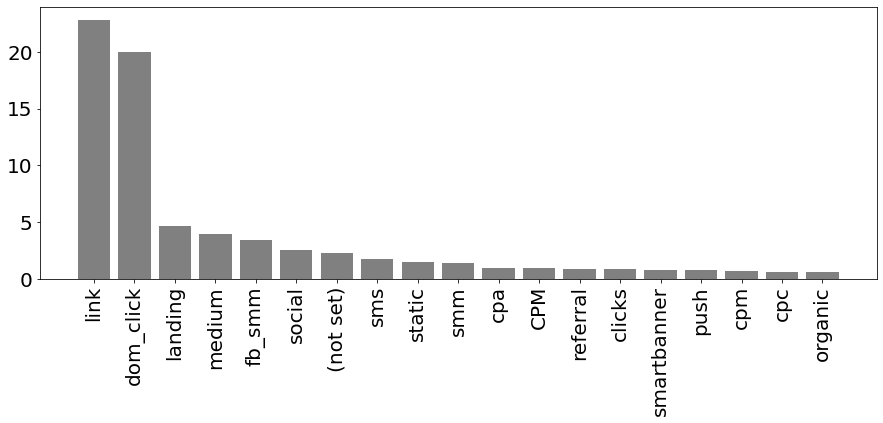

In [176]:
plt.figure(figsize = (15,5))
ax = plt.bar(cr_utm_list.keys(),cr_utm_list.values(),color = 'grey')
plt.rc('font', size = 20)
plt.xticks(rotation = 90 )

plt.show()

Видим ,что конверсия с прямых ссылок, с дом-клик и лендинга наибольшие

Конверсия по локации

In [73]:
geo_list = df_merge.geo_city.unique().tolist()

In [74]:
geo_list = geo_list[0:20]

In [75]:
cr_geo_dict = {}

In [76]:
for geo in geo_list:
    
    cr_geo = len(df_aim[df_aim.geo_city == geo])/len(df_merge[df_merge.geo_city == geo])*100
    cr_geo_dict.update({geo:cr_geo})
cr_geo_dict = sorted(cr_geo_dict.items(), key=lambda kv: kv[1], reverse=True)
cr_geo_dict

[('Kazan', 0.9053340916781258),
 ('Moscow', 0.7482131227024846),
 ('Tula', 0.7357496902106567),
 ('Sochi', 0.7333365028049824),
 ('Alexandrov', 0.7301554187962866),
 ('Balashikha', 0.6051604689993635),
 ('Saint Petersburg', 0.5761972158298188),
 ('Pushkino', 0.5544683626875407),
 ('Zlatoust', 0.5494505494505495),
 ('Krasnoyarsk', 0.542298556550338),
 ('Yaroslavl', 0.5388850573369025),
 ('Reutov', 0.5219074876888757),
 ('Novorossiysk', 0.5094660041512045),
 ('Mytishchi', 0.4995836802664446),
 ('(not set)', 0.49188727015041067),
 ('Yekaterinburg', 0.48527534232484404),
 ('Vladivostok', 0.45644235785080856),
 ('Ulyanovsk', 0.4507175898469933),
 ('Astrakhan', 0.34715764676709443),
 ('Sunny Isles Beach', 0.0)]

In [126]:
cr_geo_dict = dict(cr_geo_dict)

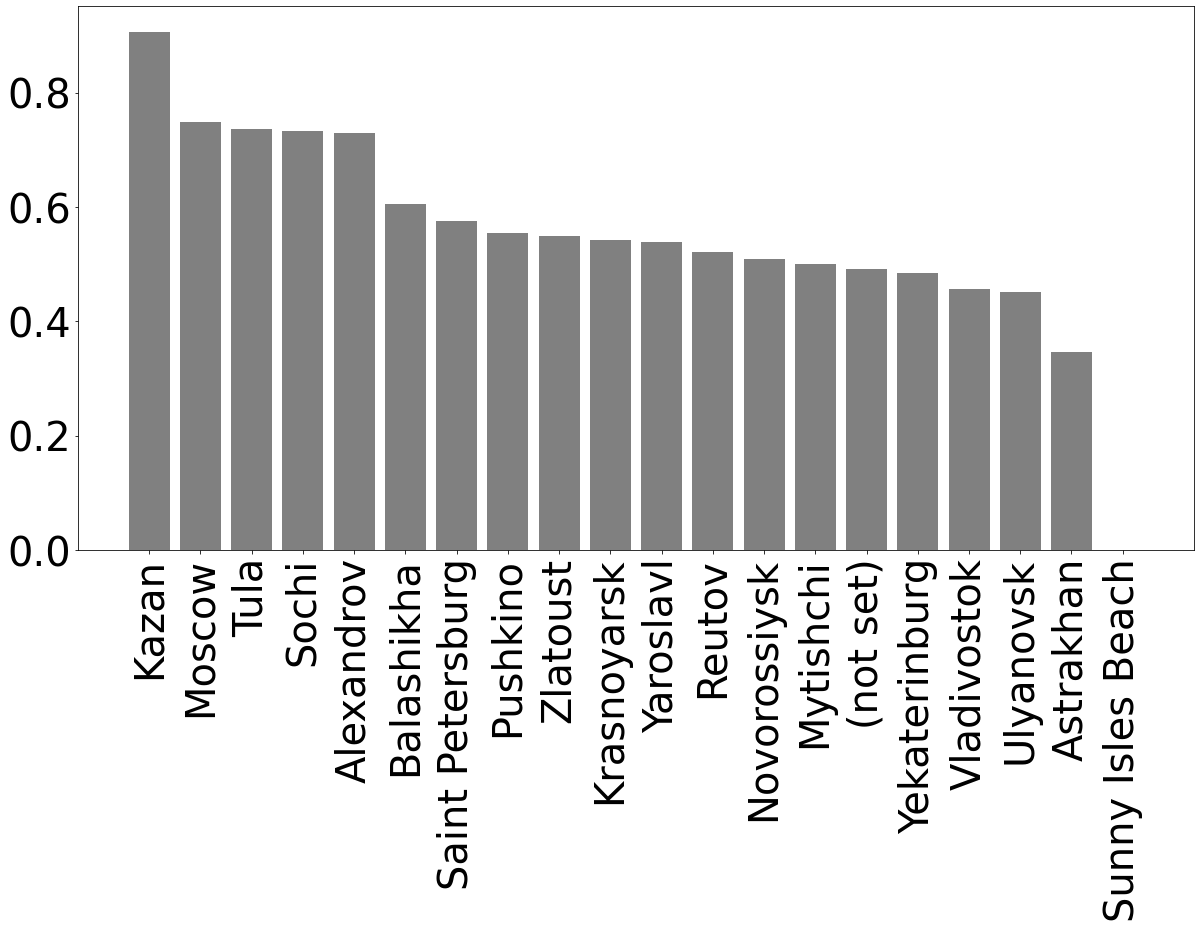

In [150]:
plt.figure(figsize=(20,10))
plt.bar(cr_geo_dict.keys(), cr_geo_dict.values(), color='grey')
plt.rc('font', size=40)   
plt.xticks(rotation=90)
plt.show()

# Определим какие авто пользуются наибольшим спросом

In [77]:
df_merge_hpp_2 = df_merge.copy()

In [78]:
df_merge_hpp_2.hit_page_path = df_merge_hpp_2.hit_page_path.apply(lambda x: str(x))

In [79]:
#Выделим названия марки авто из ссылки в hit_page_path

In [80]:
df_merge_hpp_2.hit_page_path =df_merge_hpp_2.hit_page_path.apply(lambda x: x.split('/')[3] if len(x.split('/'))>=4 else 'other')

In [81]:
df_merge_hpp_2.hit_page_path = df_merge_hpp_2.hit_page_path.apply(lambda x: x.split('?')[0] if len(x.split('?')) > 1 else x)

In [82]:
df_merge_hpp_2.hit_page_path = df_merge_hpp_2.hit_page_path.apply(lambda x: 'other' if x=='sberauto.com' or x=='cars' or x=='zen.yandex.com' else x)

In [83]:
df_merge_hpp_2.hit_page_path.value_counts().head(20)

other            12405157
skoda              742324
mercedes-benz      471174
volkswagen         414428
lada-vaz           402288
kia                236024
nissan             234999
bmw                190688
toyota             160578
renault            148534
porsche             63308
lexus               61582
audi                60295
volvo               51565
haval               51521
mini                34703
peugeot             27267
land-rover          24680
hyundai             17380
                      815
Name: hit_page_path, dtype: int64

In [84]:
#Наибольшим спросом пользуются шкода, мерседес и фольксваген

In [85]:
#выделим датасет с целевыми действиями из подготовленного датасета с машинами
df_aim_cars = df_merge_hpp_2[df_merge_hpp_2.event_action.isin(aim)]

In [86]:
cars_list = df_merge_hpp_2.hit_page_path.value_counts().head(20).keys().to_list()

In [87]:
cars_list.pop(0)

'other'

In [88]:
cars_list.pop(-1)

''

In [89]:
cars_list

['skoda',
 'mercedes-benz',
 'volkswagen',
 'lada-vaz',
 'kia',
 'nissan',
 'bmw',
 'toyota',
 'renault',
 'porsche',
 'lexus',
 'audi',
 'volvo',
 'haval',
 'mini',
 'peugeot',
 'land-rover',
 'hyundai']

In [90]:
cr_cars_dict = {}

In [91]:
for car in cars_list:
    
    cr_cars = len(df_aim_cars[df_aim_cars.hit_page_path == car])/len(df_merge_hpp_2[df_merge_hpp_2.hit_page_path == car])*100
    cr_cars_dict.update({car:cr_cars})
cr_cars_dict = sorted(cr_cars_dict.items(), key=lambda kv: kv[1], reverse=True)
cr_cars_dict

[('hyundai', 1.8872266973532794),
 ('lada-vaz', 1.3010579485343834),
 ('volkswagen', 1.1883849546845289),
 ('kia', 1.1464935769243807),
 ('haval', 1.1082859416548592),
 ('skoda', 1.0829503020244529),
 ('toyota', 1.0250470176487438),
 ('renault', 0.8880121722972518),
 ('nissan', 0.5348958931740134),
 ('mercedes-benz', 0.5114883249075713),
 ('bmw', 0.49085417016277894),
 ('peugeot', 0.48410166134888327),
 ('volvo', 0.4673712789682924),
 ('lexus', 0.4189535903348381),
 ('audi', 0.28194709345716895),
 ('mini', 0.20171166757917183),
 ('porsche', 0.2006065584128388),
 ('land-rover', 0.1620745542949757)]

In [92]:
#лучшие конверсии : хендай лада фольксваген киа ...

In [177]:
cr_cars_dict = dict(cr_cars_dict)

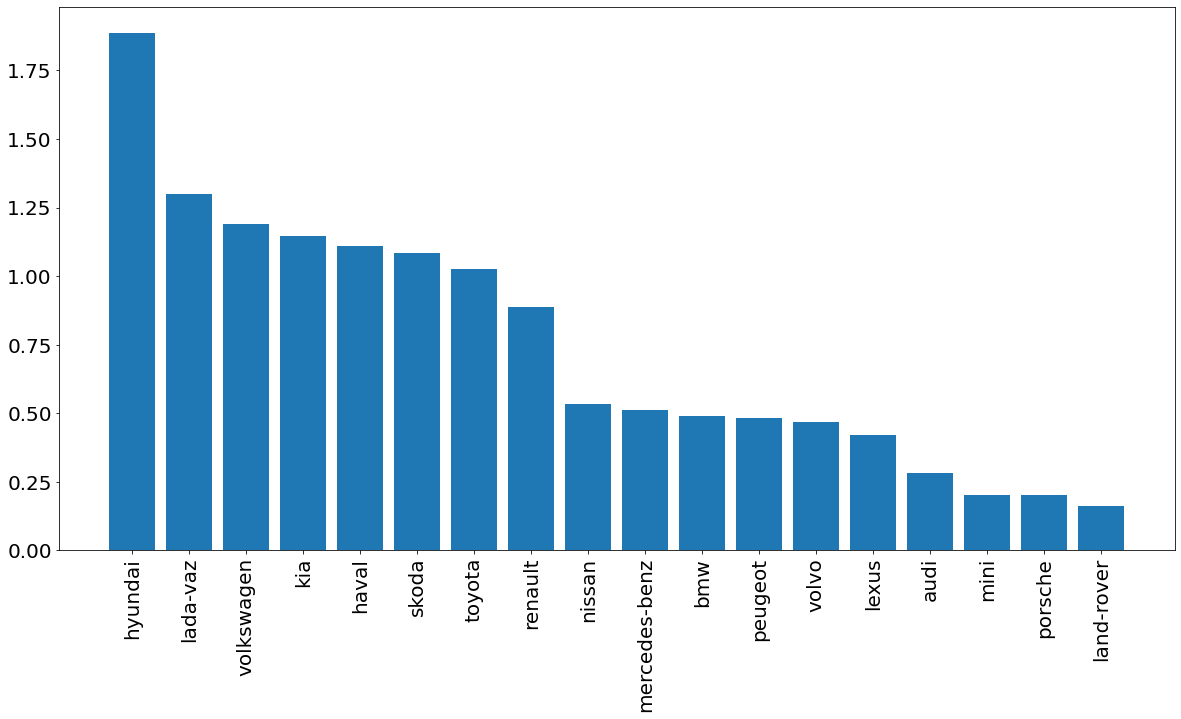

In [180]:
plt.figure(figsize = (20,10))
plt.bar(cr_cars_dict.keys(),cr_cars_dict.values())
plt.xticks(rotation = 90)
plt.show()

# Cтоит ли повышать присутствие в соц сетях

In [93]:
soc_med_list = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm']

In [94]:
df_sessions.utm_source.isin(soc_med_list).sum()/len(df_sessions)*100

14.743054189098956

In [95]:
#видим что реклама в соц сетях составляет 14% от всех каналов привлечения

In [96]:
cr_soc_med = df_aim.utm_source.isin(soc_med_list).sum()/df_merge.utm_source.isin(soc_med_list).sum()*100

In [97]:
cr_soc_med

0.6650700179356692

In [98]:
#конверсия не самая высокая,поэтому 14% из общих показов считаю достойным для рекламы в соц сетях.
#Если бы конверсия была больше, я бы предположил ,что стоит увеличить присутствие в соц сетях 